<a href="https://colab.research.google.com/github/shashithenuwara/FDM-MINI_project/blob/ui-with-streamlit/Ensemble_L.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Data Cleaning**

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

**Load the dataset**

In [4]:
data = pd.read_csv('Sleep_Data_Sampled.csv')

**Drop Co-relevant columns**

In [5]:
drop_cols = ['Person ID', 'Sleep Duration', 'Physical Activity Level', 'Daily Steps']

In [6]:
data_cleaned = data.drop(columns=drop_cols)

In [7]:
data_cleaned.head()

,Gender,Age,Occupation,Quality of Sleep,Stress Level,BMI Category,Blood Pressure,Heart Rate,Fatigue Score,Sleep Disorder
0,Male,35,Doctor,7,7,Under Weight,120/80,71,7.52,Healthy
1,Male,42,Teacher,8,4,Normal,135/90,66,7.54,Healthy
2,Male,34,Software Engineer,7,6,Overweight,126/83,74,9.50,Healthy
3,Male,32,Doctor,6,7,Normal,120/80,71,7.54,Healthy
4,Male,37,Lawyer,7,6,Normal,125/80,71,8.76,Healthy


**Handle Noisy Data**

In [8]:
data_cleaned = data_cleaned.dropna() #Drop Rows with null Values

In [9]:
# Calculate the mean of valid (non-negative) Fatigue Score values
mean_fatigue_score = data_cleaned[data_cleaned['Fatigue Score'] >= 0]['Fatigue Score'].mean()

# Replace negative values in Fatigue Score with the mean value
data_cleaned['Fatigue Score'] = data_cleaned['Fatigue Score'].apply(lambda x: mean_fatigue_score if x < 0 else x)

<ipython-input-9-b7ed5faa3a46>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Fatigue Score'] = data_cleaned['Fatigue Score'].apply(lambda x: mean_fatigue_score if x < 0 else x)


**Encode Categorical Variables**

In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data_cleaned['Encoded_Column_Gender'] = label_encoder.fit_transform(data_cleaned['Gender'])
data_cleaned['Encoded_Column_Occupation'] = label_encoder.fit_transform(data_cleaned['Occupation'])
data_cleaned['Encoded_Column_BMI Category'] = label_encoder.fit_transform(data_cleaned['BMI Category'])


<ipython-input-10-08e57ea9bbb2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Encoded_Column_Gender'] = label_encoder.fit_transform(data_cleaned['Gender'])
<ipython-input-10-08e57ea9bbb2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Encoded_Column_Occupation'] = label_encoder.fit_transform(data_cleaned['Occupation'])
<ipython-input-10-08e57ea9bbb2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [11]:
data_cleaned = pd.get_dummies(data_cleaned, columns=['Gender'],)
data_cleaned = pd.get_dummies(data_cleaned, columns=['Occupation'])
data_cleaned = pd.get_dummies(data_cleaned, columns=['BMI Category'])

**Handle Other Non-Numerical Values**

In [12]:
def convert_blood_pressure(bp):
    try:

        systolic, diastolic = map(int, bp.split('/'))
        return (systolic + diastolic) / 2
    except:
        return None

In [13]:
data_cleaned ['Blood Pressure'] = data_cleaned ['Blood Pressure'].apply(convert_blood_pressure)

In [14]:
data_cleaned.head()

,Age,Quality of Sleep,Stress Level,Blood Pressure,Heart Rate,Fatigue Score,Sleep Disorder,Encoded_Column_Gender,Encoded_Column_Occupation,Encoded_Column_BMI Category,...,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Obese,BMI Category_Overweight,BMI Category_Under Weight
0,35,7,7,100.0,71,7.52,Healthy,1,1,3,...,False,False,False,False,False,False,False,False,False,True
1,42,8,4,112.5,66,7.54,Healthy,1,10,0,...,False,False,False,False,False,True,True,False,False,False
2,34,7,6,104.5,74,9.50,Healthy,1,9,2,...,False,False,False,False,True,False,False,False,True,False
3,32,6,7,100.0,71,7.54,Healthy,1,1,0,...,False,False,False,False,False,False,True,False,False,False
4,37,7,6,102.5,71,8.76,Healthy,1,3,0,...,False,False,False,False,False,False,True,False,False,False


**2. Data Transformation**

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [16]:
numeric_columns = ['Quality of Sleep', 'Blood Pressure','Stress Level', 'Heart Rate', 'Fatigue Score']

**Scale Numeric values from 0 to 10**

In [17]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 10))

# Apply the scaler to the numeric columns

data_cleaned[numeric_columns] = scaler.fit_transform(data_cleaned[numeric_columns])

data_cleaned[numeric_columns] = data_cleaned[numeric_columns].round(2)

In [18]:
data_cleaned.head()

,Age,Quality of Sleep,Stress Level,Blood Pressure,Heart Rate,Fatigue Score,Sleep Disorder,Encoded_Column_Gender,Encoded_Column_Occupation,Encoded_Column_BMI Category,...,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Obese,BMI Category_Overweight,BMI Category_Under Weight
0,35,6.0,8.0,2.22,2.86,3.40,Healthy,1,1,3,...,False,False,False,False,False,False,False,False,False,True
1,42,8.0,2.0,7.78,0.48,3.42,Healthy,1,10,0,...,False,False,False,False,False,True,True,False,False,False
2,34,6.0,6.0,4.22,4.29,5.09,Healthy,1,9,2,...,False,False,False,False,True,False,False,False,True,False
3,32,4.0,8.0,2.22,2.86,3.42,Healthy,1,1,0,...,False,False,False,False,False,False,True,False,False,False
4,37,6.0,6.0,3.33,2.86,4.46,Healthy,1,3,0,...,False,False,False,False,False,False,True,False,False,False


**3. Data Mining**

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

**Define features and Target Variable**

In [20]:
X = data_cleaned.drop(columns=['Sleep Disorder'])
y = data_cleaned['Sleep Disorder']

**Define Base Models**

In [21]:
estimators = [
    ('rf', RandomForestClassifier()),
    ('knn', KNeighborsClassifier()),
    ('lr', LogisticRegression())
]

**Define Stacking Model with Final Estimator**

In [22]:
stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=SVC()
)

**Cross Validation**

In [23]:
kfold = StratifiedKFold(n_splits=10)
scores = cross_val_score(stacking_model, X, y, cv=kfold, scoring='accuracy')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

**Training**

In [24]:
stacking_model.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

StackingClassifier(estimators=[('rf', RandomForestClassifier()),
                               ('knn', KNeighborsClassifier()),
                               ('lr', LogisticRegression())],
                   final_estimator=SVC())

**Get the average accuracy score across folds**

In [25]:
print("Accuracy:", scores.mean())

Accuracy: 0.9610000000000001


**4. Evaluation**

In [26]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
trained_columns = X_train.columns
trained_columns

Index(['Age', 'Quality of Sleep', 'Stress Level', 'Blood Pressure',
       'Heart Rate', 'Fatigue Score', 'Encoded_Column_Gender',
       'Encoded_Column_Occupation', 'Encoded_Column_BMI Category',
       'Gender_Female', 'Gender_Male', 'Occupation_Accountant',
       'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Lawyer',
       'Occupation_Manager', 'Occupation_Nurse',
       'Occupation_Sales Representative', 'Occupation_Salesperson',
       'Occupation_Scientist', 'Occupation_Software Engineer',
       'Occupation_Teacher', 'BMI Category_Normal', 'BMI Category_Obese',
       'BMI Category_Overweight', 'BMI Category_Under Weight'],
      dtype='object')

In [29]:
stacking_model.fit(X_train, y_train)
y_pred = stacking_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

**Accuracy and F1-Score**

In [30]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted')) # Set average to 'weighted'

Accuracy: 0.9567857142857142
F1 Score: 0.9567856797125576


**Classification Report**

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Healthy       0.95      0.95      0.95       955
    Insomnia       0.95      0.96      0.95       914
 Sleep Apnea       0.96      0.96      0.96       931

    accuracy                           0.96      2800
   macro avg       0.96      0.96      0.96      2800
weighted avg       0.96      0.96      0.96      2800



**Confusion Matrix**

In [32]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[911  20  24]
 [ 29 873  12]
 [ 14  22 895]]


**5. Visualization**

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

**Confusion Matrix visualization**

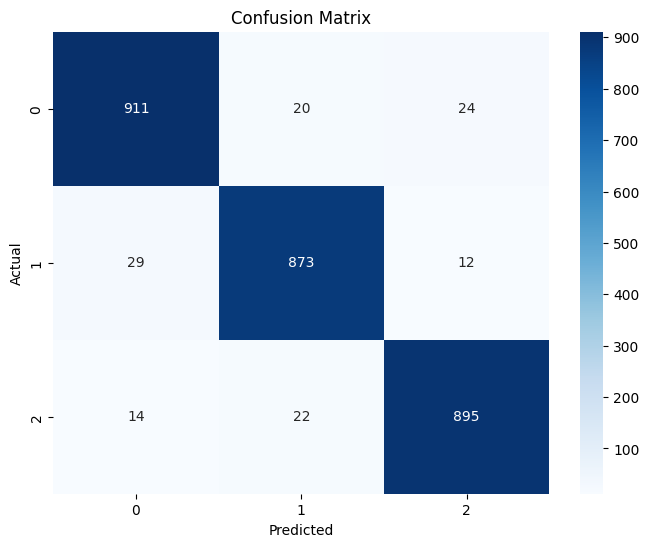

In [34]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Feature Importance**

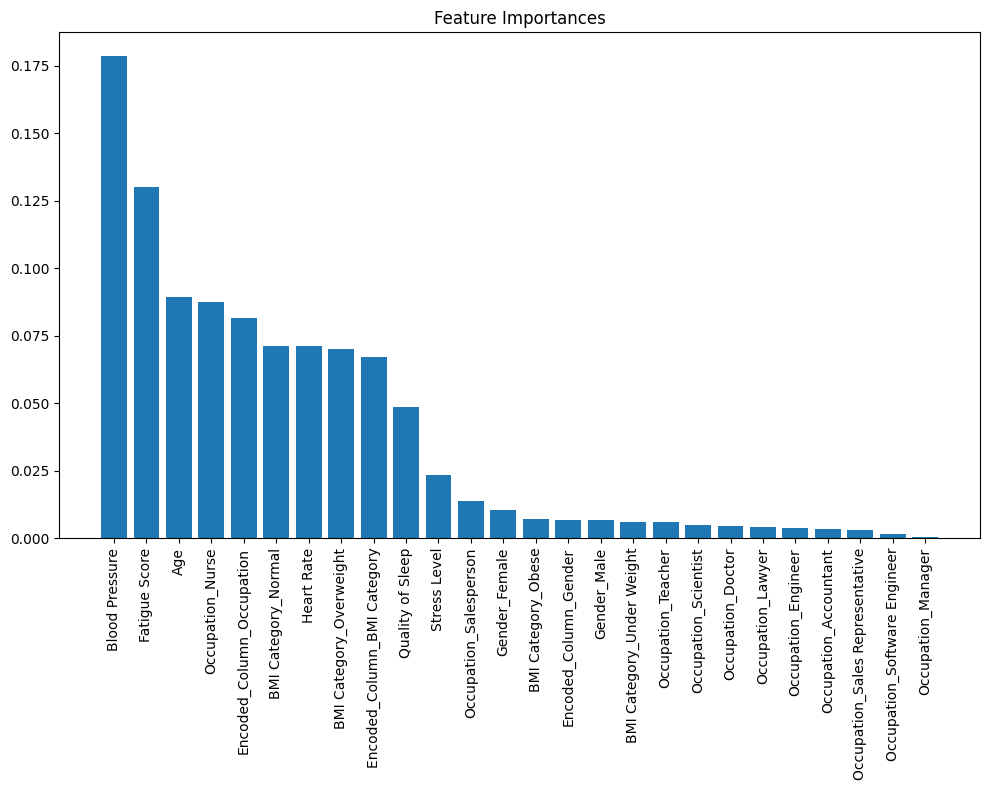

In [35]:
importances = stacking_model.named_estimators_['rf'].feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 8))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

**6. User Interface**

In [36]:
#Saving the created model
import joblib
joblib.dump(stacking_model, 'sleep_data_model.pkl')

['sleep_data_model.pkl']

In [37]:
# After cleaning and transforming the data for training
trained_columns = X.columns  # X is the feature matrix

# Save the trained columns
joblib.dump(trained_columns, 'trained_columns.pkl')

['trained_columns.pkl']

In [38]:
#Installing dependencies
!pip install streamlit
!pip install pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.2 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [39]:
!ngrok authtoken 2mbP5iUf3y2gkyROZfGLTM6nDGS_3PyYLEZNaADmoEbuHmjH

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [44]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load the trained model and columns
model = joblib.load('sleep_data_model.pkl')
trained_columns = joblib.load('trained_columns.pkl')

# Function to capture user input
def user_input_features():
    age = st.sidebar.slider('Age', 18, 100, 25)
    gender = st.sidebar.selectbox('Gender', ['Male', 'Female'])
    occupation = st.sidebar.selectbox('Occupation', ['Office Worker', 'Manual Labor', 'Student', 'Other'])
    bmi_category = st.sidebar.selectbox('BMI Category', ['Underweight', 'Normal', 'Overweight', 'Obese'])
    blood_pressure = st.sidebar.slider('Blood Pressure (average of systolic and diastolic)', 80.0, 180.0, 120.0)
    stress_level = st.sidebar.slider('Stress Level', 0, 10, 5)
    heart_rate = st.sidebar.slider('Heart Rate', 50, 120, 70)
    fatigue_score = st.sidebar.slider('Fatigue Score', 0, 10, 5)
    quality_of_sleep = st.sidebar.slider('Quality of Sleep', 0, 10, 5)

    # Convert categorical inputs
    gender = 0 if gender == 'Male' else 1
    occupation_encoded = {'Office Worker': 0, 'Manual Labor': 1, 'Student': 2, 'Other': 3}[occupation]
    bmi_category_encoded = {'Underweight': 0, 'Normal': 1, 'Overweight': 2, 'Obese': 3}[bmi_category]

    # Create a DataFrame for the input data
    data = {
        'Age': age,
        'Blood Pressure': blood_pressure,
        'Stress Level': stress_level,
        'Heart Rate': heart_rate,
        'Fatigue Score': fatigue_score,
        'Quality of Sleep': quality_of_sleep,
        'Encoded_Column_Gender': gender,
        'Encoded_Column_Occupation': occupation_encoded,
        'Encoded_Column_BMI Category': bmi_category_encoded
    }

    # Create DataFrame
    features = pd.DataFrame(data, index=[0])

    # Ensure all columns are present
    missing_cols = set(trained_columns) - set(features.columns)
    for col in missing_cols:
        features[col] = 0

    # Reorder columns
    features = features[trained_columns]

    return features

# Title
st.write("# Sleep Disorder Prediction")
st.write("""
This app predicts whether a person is 'Healthy', has 'Sleep Apnea', or 'Insomnia'
based on various features such as Blood Pressure, Quality of Sleep, and more.
""")

# Capture input features
input_df = user_input_features()

# Debugging: Display input data to verify it's correct
st.write('### Input Data:', input_df)

# Add a button to predict
if st.button('Predict'):
    # Make prediction
    prediction = model.predict(input_df)

    # Debugging: Show raw model prediction
    st.write('Prediction:', prediction)

    # Map the prediction
    labels = {0: 'Healthy', 1: 'Sleep Apnea', 2: 'Insomnia'}
    prediction_label = labels.get(prediction[0], 'Unknown')

Overwriting app.py


In [45]:
#Importing ngrok and run the app
from pyngrok import ngrok

#Run the Streamlit app in the background
!streamlit run app.py &>/dev/null&

#Expose the app using ngrok
public_url = ngrok.connect(8501)
print(f'App is live at: {public_url}')

App is live at: NgrokTunnel: "https://b0c8-35-196-74-160.ngrok-free.app" -> "http://localhost:8501"


In [46]:
#Trying the model with hard-coded values
import joblib
import pandas as pd

# Load the model and columns
model = joblib.load('sleep_data_model.pkl')
trained_columns = joblib.load('trained_columns.pkl')

# Create a sample input DataFrame with values that you want to test
sample_data = {
    'Age': 22,
    'Blood Pressure': 120,
    'Stress Level': 3,
    'Heart Rate': 69,
    'Fatigue Score': 9.13,
    'Quality of Sleep': 8,
    'Encoded_Column_Gender': 1,
    'Encoded_Column_Occupation': 0,
    'Encoded_Column_BMI Category': 1
}

# Create a DataFrame
input_df = pd.DataFrame(sample_data, index=[0])

# Ensure all columns are present
missing_cols = set(trained_columns) - set(input_df.columns)
for col in missing_cols:
    input_df[col] = 0
input_df = input_df[trained_columns]

# Make prediction
prediction = model.predict(input_df)
print(f'Prediction for sample input: {prediction[0]}')


Prediction for sample input: Sleep Apnea


In [47]:
# Gender: 0 for Male, 1 for Female
# Occupation: 0 for Office Worker, 1 for Manual Labor, 2 for Student, 3 for Other
# BMI Category: 0 for Underweight, 1 for Normal, 2 for Overweight, 3 for Obese